# Pandas Exercises

## Creating DataFrames and Using Sample Data Sets

This is the Jupyter Notebook runnable exercises version of the article, [Pandas Practice Questions – Fifty-Two Examples to Make You an Expert](https://codesolid.com/pandas-practice-questions-twenty-one-examples-to-make-you-an-expert/).

In [3]:
import pandas as pd
import numpy as np
import seaborn as sb

**1.** Using NumPy, create a Pandas DataFrame with five rows and three columms:

In [4]:
df = pd.DataFrame(np.random.rand(15).reshape(5,3))
df

,0,1,2
0,0.868301,0.861290,0.031161
1,0.758114,0.965098,0.278392
2,0.616737,0.093562,0.066964
3,0.669790,0.985844,0.781807
4,0.870490,0.733956,0.435240


**2.** For a Pandas DataFrame created from a NumPy array, what is the default behavior for the labels for the columns?  For the rows?

When you create a Pandas DataFrame from a NumPy array, the default labels for both the rows and columns are a zero-based integer index. This means the labels start at 0 and increase by 1 for each subsequent row or column.

**3.** Create a second DataFrame as above with five rows and three columns, setting the row labels to the names of any five major US cities and the column labels to the first three months of the year.

In [5]:
df = pd.DataFrame(np.random.rand(15).reshape(5,3), columns=["January", "February", "March"], index=["San Francisco", "Las Vegas", "Washington DC", "Seattle", "New York"])
df

,January,February,March
San Francisco,0.704174,0.978244,0.501002
Las Vegas,0.727535,0.609001,0.992551
Washington DC,0.019802,0.326549,0.853868
Seattle,0.823620,0.968802,0.254433
New York,0.933624,0.902858,0.363102


**4.** You recall that the Seaborn package has some data sets built in, but can't remember how to list and load them. Assuming the functions to do so have "data" in the name, how might you locate them?  You can assume a Jupyter Notebook / IPython environment and explain the process, or write the code to do it in Python.

In [6]:
import seaborn as sb

# List all attributes in the seaborn module
all_seaborn_attributes = dir(sb)

# Filter for attributes that contain "data" in their name
data_related_functions = [attribute for attribute in all_seaborn_attributes if "data" in attribute]

# Print the list of data-related functions
print(data_related_functions)

['get_data_home', 'get_dataset_names', 'load_dataset']


## Loading data from CSV

**5**. Zillow home data is available at this URL: https://files.zillowstatic.com/research/public_csvs/zhvi/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv

Open this file as a DataFrame named df_homes in Pandas.

In [7]:
df_homes = pd.read_csv("https://files.zillowstatic.com/research/public_csvs/zhvi/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")

**6.** Save the DataFrame, df_homes, to a local CSV file, "zillow_home_data.csv".  

In [8]:
df_homes.to_csv("zillow_home_data.csv", index=False)

**7.** Load zillow_home_data.csv back into a new Dataframe, df_homes_2

In [9]:
df_homes_2 = pd.read_csv("/content/zillow_home_data.csv")

**8.** Compare the dimensions of the two DataFrames, df_homes and df_homes_2.  Are they equal?  If not, how can you fix it?

In [10]:
print("Dimensions of df_homes:", df_homes.shape)
print("Dimensions of df_homes_2:", df_homes_2.shape)

Dimensions of df_homes: (895, 312)
Dimensions of df_homes_2: (895, 312)


No, they are not equal. the index from the previous csv is imported as a new column. to prevent that, i use index=False to exclude index

**9.** A remote spreadsheet showing how a snapshot of how traffic increased for a hypothetical website is available here: https://github.com/CodeSolid/CodeSolid.github.io/raw/main/booksource/data/AnalyticsSnapshot.xlsx. Load the worksheet page of the spreasheet data labelled "February 2022" as a DataFrame named "feb".  Note: the leftmost column in the spreadsheet is the index column.

In [11]:
feb = pd.DataFrame(pd.read_excel("https://github.com/CodeSolid/CodeSolid.github.io/raw/main/booksource/data/AnalyticsSnapshot.xlsx", sheet_name="February 2022"))

**10.** The "Month to Month Increase" column is a bit hard to understand, so ignore it for now.  Given the values for "This Month" and "Last Month", create a new column, "Percentage Increase".

In [12]:
feb["Percentage Increase"] = (feb["This Month"] - feb["Last Month"]) / feb["Last Month"] * 100
feb

,Unnamed: 0,This Month,Last Month,Month to Month Increase,Percentage Increase
0,Users,1800,280,5.428571,542.857143
1,New Users,1700,298,4.704698,470.469799
2,Page Views,2534,436,4.811927,481.192661


## Basic Operations on Data

**11.** Using Seaborn, get a dataset about penguins into a dataframe named "df_penguins".  Note that because all of the following questions depend on this example, we'll provide the solution here so no one gets stuck:

In [13]:
df_penguins = sb.load_dataset('penguins')

**12.** Write the code to show the the number of rows and columns in df_penguins

In [14]:
print(df_penguins.shape)

(344, 7)


**13.** How might you show the first few rows of df_penguins?

In [15]:
df_penguins.loc[0]

,0
species,Adelie
island,Torgersen
bill_length_mm,39.1
bill_depth_mm,18.7
flipper_length_mm,181.0
body_mass_g,3750.0
sex,Male


**14.** How can you return the unique species of penguins from df_penguins?  How many unique species are there?

In [16]:
df_penguins["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

**15.** What function can we use to drop the rows that have missing data?

In [17]:
df_penguins.dropna()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


**16.** By default, will this modify df_penguins or will it return a copy?

it will return a copy

**17.** How can we override the default?

by doing inplace=True or assign it in a new DataFrame

**18.** Create a new DataFrame, df_penguins_full, with the missing data deleted.

In [18]:
df_penguins_full = df_penguins.dropna()

**19.** What is the average bill length of a penguin, in millimeters, in this (df_full) data set?

In [19]:
df_penguins_full['bill_length_mm'].mean()

np.float64(43.99279279279279)

**20.** Which of the following is most strongly correlated with bill length?  a) Body mass?  b) Flipper length?  c) Bill depth?  Show how you arrived at the answer.

In [20]:
correlation_matrix = df_penguins_full[['bill_length_mm', 'body_mass_g', 'flipper_length_mm', 'bill_depth_mm']].corr()
print("Correlation with Bill Length (mm):")
print(correlation_matrix['bill_length_mm'].sort_values(ascending=False))

Correlation with Bill Length (mm):
bill_length_mm       1.000000
flipper_length_mm    0.653096
body_mass_g          0.589451
bill_depth_mm       -0.228626
Name: bill_length_mm, dtype: float64


**21.** How could you show the median flipper length, grouped by species?

In [22]:
median_flipper_length_by_species = df_penguins_full.groupby('species')['flipper_length_mm'].median()
print(median_flipper_length_by_species)

species
Adelie       190.0
Chinstrap    196.0
Gentoo       216.0
Name: flipper_length_mm, dtype: float64


**22.** Which species has the longest flippers?

Gento

**23.** Which two species have the most similar mean weight?  Show how you arrived at the answer.

Chinstrap and Adelie. i used group by species and calculate mean of each body mass

In [24]:
df_penguins_full.groupby('species')['body_mass_g'].mean()

,body_mass_g
species,
Adelie,3706.164384
Chinstrap,3733.088235
Gentoo,5092.436975


**24.** How could you sort the rows by bill length?

In [28]:
df_penguins_full.sort_values('bill_length_mm',)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
142,Adelie,Dream,32.1,15.5,188.0,3050.0,Female
98,Adelie,Dream,33.1,16.1,178.0,2900.0,Female
70,Adelie,Torgersen,33.5,19.0,190.0,3600.0,Female
92,Adelie,Dream,34.0,17.1,185.0,3400.0,Female
18,Adelie,Torgersen,34.4,18.4,184.0,3325.0,Female
...,...,...,...,...,...,...,...
335,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,Male
215,Chinstrap,Dream,55.8,19.8,207.0,4000.0,Male
321,Gentoo,Biscoe,55.9,17.0,228.0,5600.0,Male
169,Chinstrap,Dream,58.0,17.8,181.0,3700.0,Female


**25.** How could you run the same sort in descending order?

In [29]:
df_penguins_full.sort_values('bill_length_mm', ascending=False)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,Male
169,Chinstrap,Dream,58.0,17.8,181.0,3700.0,Female
321,Gentoo,Biscoe,55.9,17.0,228.0,5600.0,Male
215,Chinstrap,Dream,55.8,19.8,207.0,4000.0,Male
335,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,Male
...,...,...,...,...,...,...,...
18,Adelie,Torgersen,34.4,18.4,184.0,3325.0,Female
92,Adelie,Dream,34.0,17.1,185.0,3400.0,Female
70,Adelie,Torgersen,33.5,19.0,190.0,3600.0,Female
98,Adelie,Dream,33.1,16.1,178.0,2900.0,Female


**26.** How could you sort by species first, then by body mass?

In [30]:
df_penguins_full.sort_values(['species', 'body_mass_g'])

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
58,Adelie,Biscoe,36.5,16.6,181.0,2850.0,Female
64,Adelie,Biscoe,36.4,17.1,184.0,2850.0,Female
54,Adelie,Biscoe,34.5,18.1,187.0,2900.0,Female
98,Adelie,Dream,33.1,16.1,178.0,2900.0,Female
116,Adelie,Torgersen,38.6,17.0,188.0,2900.0,Female
...,...,...,...,...,...,...,...
331,Gentoo,Biscoe,49.8,15.9,229.0,5950.0,Male
297,Gentoo,Biscoe,51.1,16.3,220.0,6000.0,Male
337,Gentoo,Biscoe,48.8,16.2,222.0,6000.0,Male
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,Male


## Selecting Rows, Columns, and Cells

Let's look at some precious stones now, and leave the poor penguins alone for a while.  Let's look at some precious stones now, and leave the poor penguins alone for a while.  

**27.** Load the Seaborn "diamonds" dataset into a Pandas dataframe named diamonds.

In [32]:
diamonds = sb.load_dataset('diamonds')

**28.** Display the columns that are available.

In [35]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**29.** If you select a single column from the diamonds DataFrame, what will be the type of the return value?

**30.** Select the 'table' column and show its type

In [37]:
diamonds['table'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 53940 entries, 0 to 53939
Series name: table
Non-Null Count  Dtype  
--------------  -----  
53940 non-null  float64
dtypes: float64(1)
memory usage: 421.5 KB


**31.** Select the first ten rows of the price and carat columns ten rows of the diamonds DataFrame into a variable called subset, and display them.

In [40]:
subset = diamonds.loc[:9, ['price', 'carat']]
subset

,price,carat
0,326,0.23
1,326,0.21
2,327,0.23
3,334,0.29
4,335,0.31
5,336,0.24
6,336,0.24
7,337,0.26
8,337,0.22
9,338,0.23


**32.** For a given column, show the code to display the datatype of the _values_ in the column?  

In [41]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   10 non-null     int64  
 1   carat   10 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 292.0 bytes


**33.** Select the first row of the diamonds DataFrame into a variable called row.

In [44]:
row = diamonds.loc[0]
row

,0
carat,0.23
cut,Ideal
color,E
clarity,SI2
depth,61.5
table,55.0
price,326
x,3.95
y,3.98
z,2.43


**34.** What would you expect the data type of the row to be?  Display it.

A Pandas series

In [45]:
row.info()

<class 'pandas.core.series.Series'>
Index: 10 entries, carat to z
Series name: 0
Non-Null Count  Dtype 
--------------  ----- 
10 non-null     object
dtypes: object(1)
memory usage: 460.0+ bytes


**35.** Can you discover the names of the columns using only the row returned in #33?  Why or why not?Can you discover the names of the columns using only the row returned in #33?  Why or why not?

Yes, because a row series should have the columns as the index (See below):

In [50]:
row.index

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

**36.** Select the row with the highest priced diamond.

In [53]:
diamonds[diamonds['price'] == diamonds['price'].max()]

,carat,cut,color,clarity,depth,table,price,x,y,z
27749,2.29,Premium,I,VS2,60.8,60.0,18823,8.5,8.47,5.16


**37.** Select the row with the lowest priced diamond.

In [54]:
diamonds[diamonds['price'] == diamonds['price'].min()]

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


## Some Exercises Using Time Series

**38.** Load the taxis dataset into a DataFrame, ```taxis```.

In [57]:
taxis = sb.load_dataset('taxis')

**39.** The 'pickup' column contains the date and time the customer picked up, but it's a string.  Add a column to the DataFrame, 'pickup_time', containing the value in 'pickup' as a DateTime.

In [60]:
taxis['pickup_time'] = pd.to_datetime(taxis['pickup'])

**40.** We have a hypothesis that as the day goes on, the tips get higher.  We'll need to wrangle the data a bit before testing this, however.  First, now that we have a datetime column, pickup_time, create a subset of it to create a new DataFrame, taxis_one_day. This new DataFrame should have values between '2019-03-23 00:06:00' (inclusive) and '2019-03-24 00:00:00' (exlusive).

In [61]:
start_time = pd.to_datetime('2019-03-23 00:06:00')
end_time = pd.to_datetime('2019-03-24 00:00:00')

taxis_one_day = taxis[(taxis['pickup_time'] >= start_time) & (taxis['pickup_time'] < end_time)]

**41.** We now have a range from morning until midnight, but we to take the mean of the numeric columns, grouped at one hour intervals.  Save the result as df_means, and display it.

In [63]:
df_means = taxis_one_day.set_index('pickup_time').resample('h').mean(numeric_only=True)
display(df_means)

,passengers,distance,fare,tip,tolls,total
pickup_time,,,,,,
2019-03-23 00:00:00,1.000000,1.911667,8.583333,1.415000,0.000000,12.965000
2019-03-23 01:00:00,1.250000,1.325000,7.875000,1.525000,0.000000,12.575000
2019-03-23 02:00:00,1.727273,1.739091,8.181818,1.641818,0.000000,13.169091
2019-03-23 03:00:00,1.500000,3.377500,11.750000,2.410000,0.000000,17.335000
2019-03-23 04:00:00,2.000000,0.950000,5.500000,0.915000,0.000000,10.215000
2019-03-23 05:00:00,2.000000,1.270000,6.000000,0.980000,0.000000,10.530000
2019-03-23 06:00:00,1.000000,0.400000,21.500000,0.000000,0.000000,23.133333
2019-03-23 07:00:00,2.333333,0.980000,5.250000,1.165000,0.000000,9.298333
2019-03-23 08:00:00,1.000000,0.020000,2.500000,0.000000,0.000000,3.300000


**42.** Create a simple line plot of the value "distance".  

<Axes: xlabel='pickup_time'>

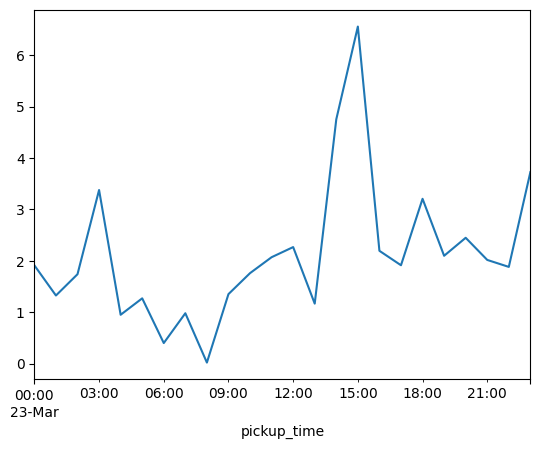

In [65]:
df_means['distance'].plot(kind='line')

**43.** Overall, do riders travel further or less far as the day progresses?

further

**44.** Create a new column in taxis_means, ```tip_in_percent```.  The source columns for this should be "fare" and "tip"

In [67]:
df_means['tip_in_percent'] = (df_means['tip'] / df_means['fare']) * 100

**45.** Create a new column, time_interval, as a range of integer values beginning with zero.

In [68]:
df_means['time_interval'] = np.arange(len(df_means))

Display the correlations between the following pairs of values:
1. tip_in_percent and distance.
1. tip_in_percent and passengers.
1. tip_in_percent and time_interval.

In [69]:
correlation_tip_distance = df_means['tip_in_percent'].corr(df_means['distance'])
correlation_tip_passengers = df_means['tip_in_percent'].corr(df_means['passengers'])
correlation_tip_time = df_means['tip_in_percent'].corr(df_means['time_interval'])

print("Correlation between tip_in_percent and distance:", correlation_tip_distance)
print("Correlation between tip_in_percent and passengers:", correlation_tip_passengers)
print("Correlation between tip_in_percent and time_interval:", correlation_tip_time)

Correlation between tip_in_percent and distance: 0.00953302789086911
Correlation between tip_in_percent and passengers: 0.32623184018268747
Correlation between tip_in_percent and time_interval: -0.23239795213315184


**47.** Admittedly, the size of the data set is fairly small given how we've subsetted it.  But based on the values in #45, which of the three pairs show the strongest correlation.

The pair with the strongest correlation is tip_in_percent and passengers. This is because the absolute value of the correlation coefficient (approximately 0.33) is the largest among the three pairs.

**48.** Did our hypothesis that people tip more as the day goes on turn out to be warranted?

the correlation between tip_in_percent and time_interval was approximately -0.23. This is a weak negative correlation.

A negative correlation suggests that as the time_interval increases (as the day goes on), the tip_in_percent tends to slightly decrease. Therefore, based on this specific dataset and the calculated correlation, the hypothesis that people tip more as the day goes on is not strongly warranted. In fact, there's a slight indication of the opposite trend, although the correlation is weak.



In [21]:
import seaborn as sb

# List all attributes in the seaborn module
all_seaborn_attributes = dir(sb)

# Filter for attributes that contain "data" in their name
data_related_functions = [attribute for attribute in all_seaborn_attributes if "data" in attribute]

# Print the list of data-related functions
print(data_related_functions)

['get_data_home', 'get_dataset_names', 'load_dataset']
